In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import curve_fit
from scipy import stats

In [70]:
def load(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13])     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[0]
    del mean2[-1]
    return mean2

In [72]:
gain_reps = 11; conc_range = 10; concentration = []; col = []
arr_ = np.zeros((conc_range, gain_reps))

for j in range(conc_range):
    initial = 10 / 2**1
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)
    
for i in range(gain_reps):    
    a = 'C:\Clariostar\Writeup data\Clariostar data\Coumarin 30 10uM Gain '
    b = '.xlsx'
    gain = 50*i + 700
    c = a + str(gain) + b        
    
    col.append(gain)
    show = load(c) # Load mean values from each gain settings and concentrations
    
    for x in range(len(show)):
        arr_[x, i] = show[x]

df = pd.DataFrame(arr_, index = concentration, columns = col)
# df.iloc[0, 10] = np.nan

print(df, "\n", "\n", "\n", df.shape)

              700       750        800        850        900        950   \
5.000000  5917.750  9105.000  13639.250  20010.875  28479.250  40046.125   
2.500000  3105.500  4773.250   7157.750  10491.750  14941.250  21036.125   
1.250000  1595.000  2459.375   3679.250   5396.000   7673.000  10812.875   
0.625000   800.250  1241.250   1860.250   2708.125   3873.375   5449.125   
0.312500   403.125   625.250    933.375   1372.125   1958.500   2740.875   
0.156250   203.625   312.875    468.875    687.500    977.625   1374.000   
0.078125   106.000   159.500    236.250    346.625    488.625    692.500   
0.039062    52.125    80.500    119.625    172.375    249.750    351.625   
0.019531    29.000    40.000     60.375     89.000    124.750    173.625   
0.009766    13.875    21.125     34.125     47.125     56.750     85.625   

               1000       1050        1100        1150        1200  
5.000000  55172.375  75078.625  100489.125  132630.875  172365.625  
2.500000  29018.000  3957

0.9997702570466
0.999768484371111
0.9997601098608215
0.9997728892747737
0.9997789275623455
0.9997754540256069
0.9996733852994086
0.9994395867611323
0.9994297450951436
0.9960820660889511


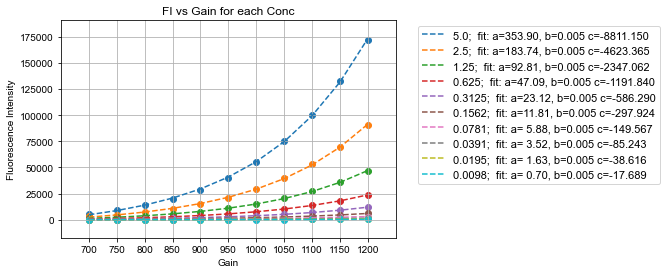

In [78]:
### scipy.optimise curve_fit
### FI vs Gain for each Concentration

def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []; popt5_clist = []
for i in range(df.shape[0]):
    x = np.array(df.columns)[np.isfinite(df.iloc[i, :])].astype(float) # subset data for regression
    y = np.array(df.iloc[i,:])[np.isfinite(df.iloc[i, :])].astype(float)
    
    plt.scatter(x, y)
    
    popt5, pcov5 = curve_fit(func, x, y, p0 = [1, 0.006, -50], maxfev = 30000)

    popt5_alist.append(popt5[0])
    popt5_clist.append(popt5[2])
   

    plt.plot(x, func(x, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))
    plt.savefig('1')

    residuals = y - func(x, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)
   

plt.title("FI vs Gain for each Conc")
plt.xlabel("Gain")
plt.xticks(x, col)
plt.ylabel("Fluorescence Intensity")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
# plt.legend(df.index, bbox_to_anchor=(1.05, 1), loc=2)
plt.margins(0.10) 

plt.show()


0.9999972197025585
0.9999962266871444
0.999995361933621
0.9999943730483498
0.9999926009094801
0.9999946384493025
0.9998999523567543
0.9999191993196102
0.9992848832972884
0.9961755028927404

 6.23692447279987


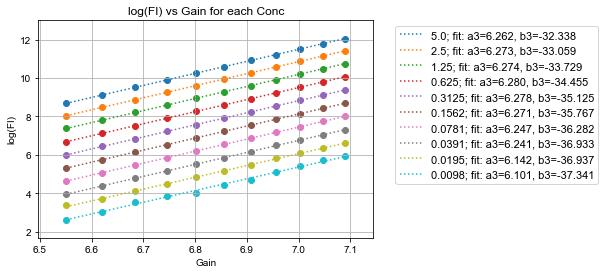

In [73]:
### Semi-log & Polyfit 1st order
### FI vs Gain for each Concentration

fit3_array = np.zeros((0, 2))
fit3_list = []
fit3_gradient = []

for i in range(df.shape[0]):
    x = np.log(np.array(df.columns)) # subset data for regression
    y = np.log(np.array(df.iloc[i,:]))
    

    fit3 = np.polyfit(x, y, 1)
    fit3_list = [fit3]
    a3 = fit3[0]
    b3 = fit3[1]
    fit_equation = a3*x + b3
    
    fit3_array = np.append(fit3_array, fit3_list, axis = 0)
    fit3_gradient.append(a3)

    
    plt.scatter(x, y)
    plt.plot(x, fit_equation, ':', label = str(round(initial*0.5**i, 4)) + '; fit: a3=%5.3f, b3=%5.3f' % tuple(fit3))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    print(r_value**2)

gradient_mean = np.mean(fit3_gradient)    
    
print("\n", gradient_mean)
    
plt.title("log(FI) vs Gain for each Conc")
plt.xlabel("Gain")
plt.ylabel("log(FI)")
# plt.legend(df.index, bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.grid()
plt.margins(0.10) 

plt.show()

0.9998578556302002
0.9999349978873957
0.9997706927347902
0.9999103730216738
0.9997064078233856
0.99990163977038
0.9996454788208123
0.9999455108324773
0.9999112684084901
0.9999164626198398
0.9998981127041482


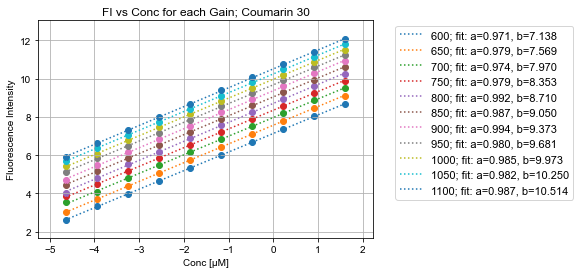

0.9827798724389584


In [74]:
conc_fit_array = np.zeros((0, 2)); a_list = []; b_list = []

for k in range(df.shape[1]): 
    x = np.log(np.array(df.index))
    y = np.log(np.array(df.iloc[:, k]))
   
    fit = np.polyfit(x, y, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    fit_conc_list = [fit]
    a = fit[0]
    b = fit[1]
    fit_equation = a*x + b
    
    conc_fit_array = np.append(conc_fit_array, fit_conc_list, axis = 0)
    a_list.append(a); b_list.append(b)
    
    plt.plot(x, fit_equation, ':', label = str(50*k + 600) + '; fit: a=%5.3f, b=%5.3f' % tuple(fit))
    plt.scatter(x, y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print(r_value**2)
    
plt.title('FI vs Conc for each Gain; Coumarin 30'); plt.xlabel('Conc [µM]'); plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
plt.show() 
a_array = np.array(a_list)
a_mean = np.mean(a_array)
print(a_mean)

74.25571738323808 0.00521747547673912 -1866.8452615899012 
 
 0.999777100649462


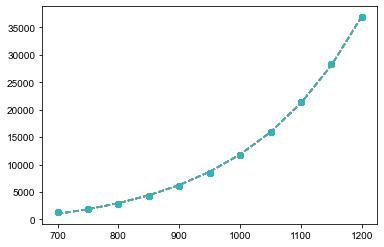

In [75]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c


for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print(*popt9,'\n','\n', r_squared1_1)

                 700          750           800           850           900   \
5.000000  4846.331290  8996.993186  14384.817161  21378.556454  30456.876296   
2.500000  2452.262054  4552.512750   7278.772162  10817.630828  15411.295175   
1.250000  1240.853921  2303.588756   3683.086381   5473.762318   7798.173938   
0.625000   627.876800  1165.624667   1863.655709   2769.744539   3945.905654   
0.312500   317.708048   589.810512    943.016872   1401.501265   1996.643260   
0.156250   160.761480   298.446361    477.170122    709.164967   1010.309079   
0.078125    81.345920   151.014993    241.449895    358.840169    511.220234   
0.039062    41.161345    76.414161    122.174565    181.574489    258.679382   
0.019531    20.827797    38.665856     61.820794     91.877382    130.892750   
0.009766    10.538944    19.565070     31.281557     46.490304     66.232229   

                  950           1000          1050           1100  \
5.000000  42241.114696  57537.808039  77393.892011

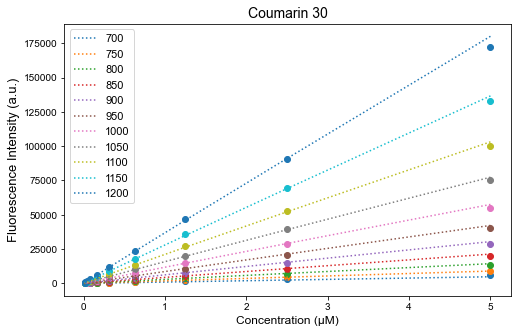

In [76]:
model = list(df.index) # concentrations
model = np.array(model, dtype = float)
model_array = []
index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 700
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 700
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, ':', label = '%2.0f' % gain)

plt.title('Coumarin 30', fontsize=14, fontname='Arial'); plt.xlabel('Concentration (\u03BCM)', fontsize=12, fontname='Arial'); plt.ylabel('Fluorescence Intensity (a.u.)', fontsize=13, fontname='Arial')
plt.grid(False); plt.legend(loc="upper left") 
params = {'legend.fontsize': 11, 'legend.handlelength': 2}; plt.rcParams["font.family"] = "Arial"; plt.rcParams.update(params)
# plt.savefig('Claristar Coumarin 30.png', dpi=300)

plt.show()

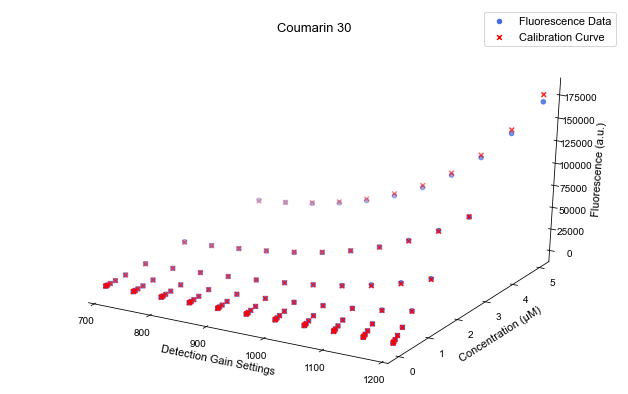

In [77]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='royalblue', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='r', marker='x')

ax.set_title('Coumarin 30', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5)
ax.grid(False)
ax.set_xlim(700,1200)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

#plt.savefig('Claristar Coumarin 30 3D.png', dpi=300)

plt.show()

In [ ]:
plt.figure(figsize=(8,5))
for i in range(df.shape[1]):
    gain = 50*i + 700
    
    x = np.log(df.index)
    y = np.log(df.iloc[:, i])
    
    x_model = np.log(model_df.index)
    y_model = np.log(model_df.iloc[:, i])
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, linewidth = 1, label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.05, 1)); plt.grid()
    
plt.show()
print('Model dataframe:', "\n", "\n", model_df)